Data Understanding

In [104]:
import pandas as pd
df=pd.read_csv("bi.csv",encoding='ISO-8859-1')
df.head()

fNAME      lNAME  Age  gender       country  residence  entryEXAM  \
0  Christina     Binger   44  Female        Norway    Private         72   
1       Alex   Walekhwa   60       M         Kenya    Private         79   
2     Philip        Leo   25    Male        Uganda  Sognsvann         55   
3      Shoni  Hlongwane   22       F           Rsa  Sognsvann         40   
4      Maria   Kedibone   23  Female  South Africa  Sognsvann         65   

  prevEducation  studyHOURS  Python  DB  
0       Masters         158    59.0  55  
1       Diploma         150    60.0  75  
2    HighSchool         130    74.0  50  
3   High School         120     NaN  44  
4   High School         122    91.0  80

In [105]:
df.shape

(77, 11)

In [106]:
df.dtypes

fNAME             object
lNAME             object
Age                int64
gender            object
country           object
residence         object
entryEXAM          int64
prevEducation     object
studyHOURS         int64
Python           float64
DB                 int64
dtype: object

In [107]:
df.describe()

Age  entryEXAM  studyHOURS     Python          DB
count  77.000000  77.000000   77.000000  75.000000   77.000000
mean   35.207792  76.753247  149.714286  75.853333   69.467532
std    10.341966  16.475784   12.743272  15.410328   17.033701
min    21.000000  28.000000  114.000000  15.000000   30.000000
25%    27.000000  69.000000  144.000000  71.000000   56.000000
50%    33.000000  80.000000  156.000000  81.000000   71.000000
75%    42.000000  90.000000  158.000000  85.000000   83.000000
max    71.000000  98.000000  160.000000  91.000000  100.000000

Data Cleaning & missing values  

In [108]:
df[df.duplicated()]

Empty DataFrame
Columns: [fNAME, lNAME, Age, gender, country, residence, entryEXAM, prevEducation, studyHOURS, Python, DB]
Index: []

In [109]:
df.duplicated().sum()

0

In [110]:
df.drop_duplicates(inplace=True)

In [111]:
df.isnull().sum()

fNAME            0
lNAME            0
Age              0
gender           0
country          0
residence        0
entryEXAM        0
prevEducation    0
studyHOURS       0
Python           2
DB               0
dtype: int64

In [112]:
df['Python'].fillna(df['Python'].mean(),inplace=True)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fNAME          77 non-null     object 
 1   lNAME          77 non-null     object 
 2   Age            77 non-null     int64  
 3   gender         77 non-null     object 
 4   country        77 non-null     object 
 5   residence      77 non-null     object 
 6   entryEXAM      77 non-null     int64  
 7   prevEducation  77 non-null     object 
 8   studyHOURS     77 non-null     int64  
 9   Python         77 non-null     float64
 10  DB             77 non-null     int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 6.7+ KB


In [114]:
df.nunique()

fNAME            71
lNAME            66
Age              32
gender            6
country          16
residence         6
entryEXAM        36
prevEducation    10
studyHOURS       18
Python           32
DB               40
dtype: int64

In [115]:
for col in df.columns:
    print(f"\nØ³ØªÙˆÙ† {col}:{df[col].unique()}\n")


Ø³ØªÙˆÙ† fNAME:['Christina' 'Alex' 'Philip' 'Shoni' 'Maria' 'Hannah' 'Ole' 'Lars' 'BjÃ¸rn'
 'Sofie' 'Emma' 'Solveig' 'Odd' 'Grethe' 'Marco' 'Ingrid' 'Hanna' 'Jorunn'
 'Sebastian' 'Camilla' 'Prof' 'Kristine' 'Carmen' 'Gunnar' 'Gerd' 'Aisha'
 'Kato' 'Nansubuga' 'Joakim' 'Don' 'Perry' 'Frank' 'Line' 'Thor' 'Petter'
 'Sindre' 'Simen' 'BjÃ¸rg' 'Trond' 'Emily' 'Unni' 'Ruth' 'Inger' 'Peninah'
 'Berit' 'Jenny' 'Thea' 'Dag' 'Mwanaidi' 'Chinedu' 'Irene' 'Marianne'
 'Jens' 'Morten' 'Karoline' 'Ola' 'Tore' 'Caroline' 'Silvia' 'Valentino'
 'Peter' 'Anna' 'Lucas' 'Marie' 'Thomas' 'Maximilan' 'Clara' 'Julian'
 'Sophie' 'Leon' 'Mohammed']


Ø³ØªÙˆÙ† lNAME:['Binger' 'Walekhwa' 'Leo' 'Hlongwane' 'Kedibone' 'Hansen' 'Johansen'
 'Olsen' 'Larsen' 'Jensen' 'de Vries' 'Eliassen' 'Knudsen' 'Myklebust'
 'Rossi' 'Eide' 'Andresen' 'Kristiansen' 'Mikkelsen' 'Birkeland' 'Isaksen'
 'Berg' 'RodrÃ­guez' 'Ahmed' 'Brekke' 'Bakken' 'Nakaweesi' 'Muwanguzi'
 'Nakalema' 'Edvardsen' 'Pettersen' 'RÃ¸nning' 'Abrahamsen' 'NÃ¦

In [116]:
df['gender'] = df['gender'].replace({'M': 'Male','F': 'Female','male':'Male','female':'Female'})
df['country']=df['country'].replace({'norway':'Norway'})
df['residence']=df['residence'].replace({'BI Residence':'BI_Residence','BIResidence':'BI_Residence','BI-Residence':'BI_Residence'})
df['prevEducation']=df['prevEducation'].replace({'Barrrchelors':'Bachelors','HighSchool':'High School','Diplomaaa':'Diploma','DIPLOMA':'Diploma','diploma':'Diploma'})

In [117]:
df['residence'].value_counts()

residence
Private         33
BI_Residence    32
Sognsvann       12
Name: count, dtype: int64

In [118]:
df['country'].unique()

array(['Norway', 'Kenya', 'Uganda', 'Rsa', 'South Africa', 'Norge',
       'Denmark', 'Netherlands', 'Italy', 'Spain', 'UK', 'Somali',
       'Nigeria', 'Germany', 'France'], dtype=object)

In [119]:
df_no_outliers = df.copy()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for coll in numerical_cols:
    Q1=df[coll].quantile(0.25)
    Q3=df[coll].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    outliers=(df[coll] < lower_bound) | (df[coll] > upper_bound)
    print(f'columns:{coll}\noutlier is :\n{df[outliers][coll]}')
    print('\n')
    df_no_outliers = df_no_outliers[(df_no_outliers[coll] >= lower_bound) & (df_no_outliers[coll] <= upper_bound)]
    print(f'columns:{coll}\ndata wihout any outlier \n {df_no_outliers[coll]}\n\n')

columns:Age
outlier is :
32    71
55    69
Name: Age, dtype: int64


columns:Age
data wihout any outlier 
 0     44
1     60
2     25
3     22
4     23
      ..
72    43
73    31
74    33
75    35
76    31
Name: Age, Length: 75, dtype: int64


columns:entryEXAM
outlier is :
32    30
53    28
76    35
Name: entryEXAM, dtype: int64


columns:entryEXAM
data wihout any outlier 
 0     72
1     79
2     55
3     40
4     65
      ..
71    74
72    80
73    90
74    96
75    90
Name: entryEXAM, Length: 73, dtype: int64


columns:studyHOURS
outlier is :
3     120
4     122
20    116
21    114
32    120
49    120
53    120
Name: studyHOURS, dtype: int64


columns:studyHOURS
data wihout any outlier 
 0     158
1     150
2     130
5     130
6     156
     ... 
71    140
72    150
73    158
74    158
75    160
Name: studyHOURS, Length: 68, dtype: int64


columns:Python
outlier is :
20    33.0
21    30.0
32    31.0
48    48.0
49    45.0
53    15.0
Name: Python, dtype: float64


columns:Python
data

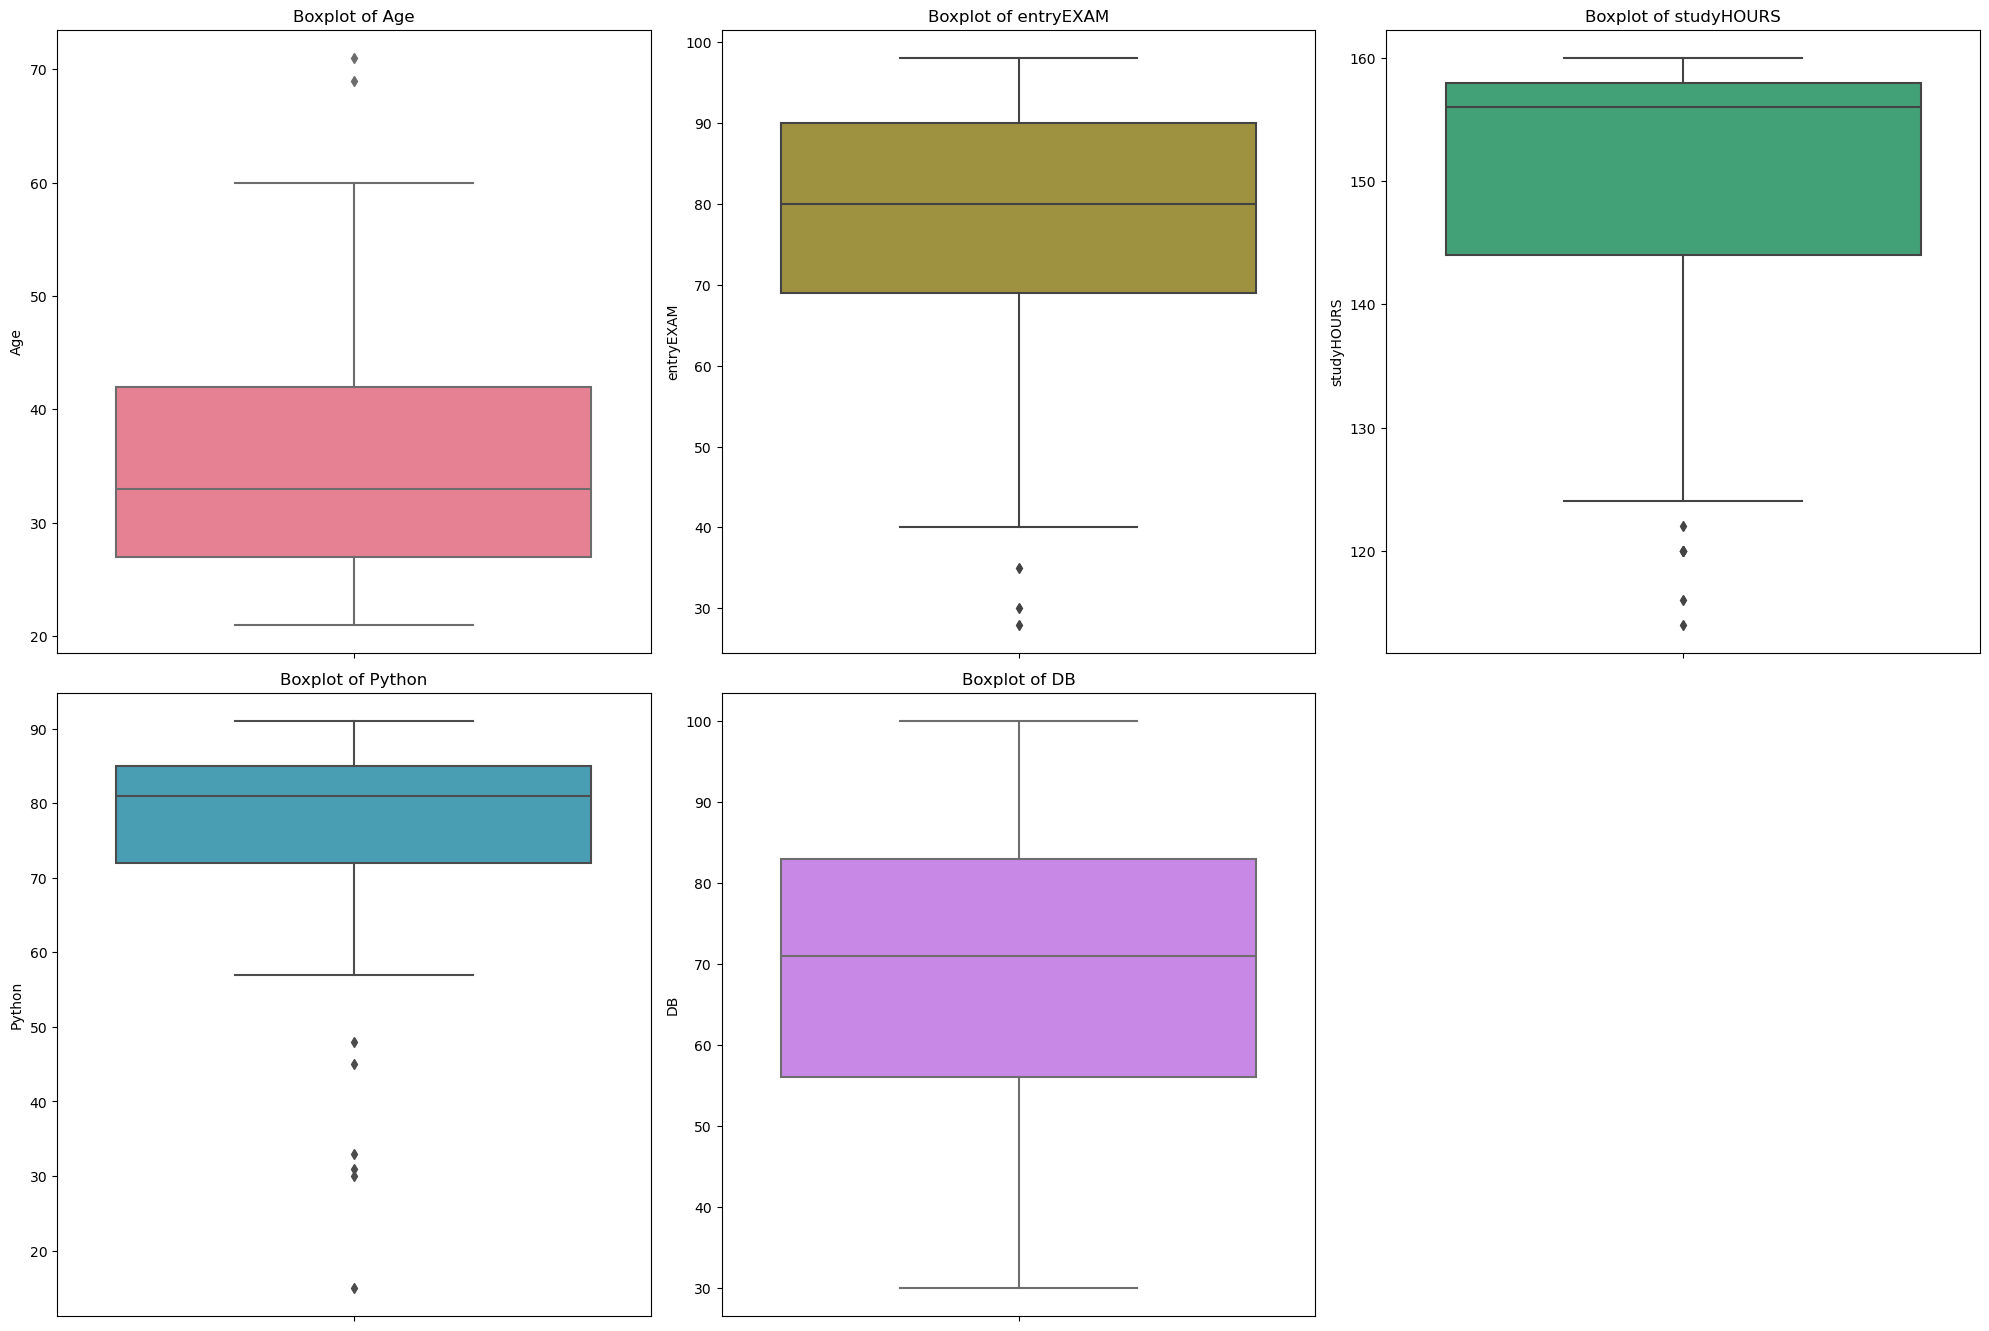

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
# Define color palette
palette = sns.color_palette("husl",len(numerical_cols))
#to show Outliers in data 
plt.figure(figsize=(20, 20))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3,3, i)
    sns.boxplot(y=df[col], color=palette[i-1])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()



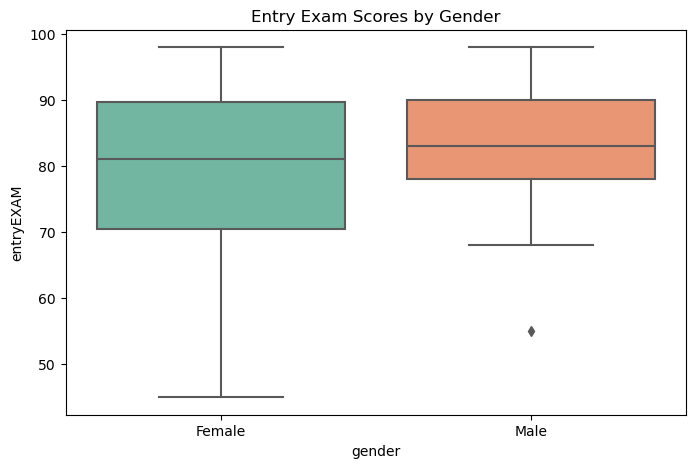

In [121]:
plt.figure(figsize=(8,5))
sns.boxplot(x="gender", y="entryEXAM", data=df_no_outliers, palette="Set2")
plt.title("Entry Exam Scores by Gender")
plt.show()

In [122]:
df.columns

Index(['fNAME', 'lNAME', 'Age', 'gender', 'country', 'residence', 'entryEXAM',
       'prevEducation', 'studyHOURS', 'Python', 'DB'],
      dtype='object')

In [123]:
df['country'].value_counts().sort_values(ascending=False)

country
Norway          48
Uganda           4
Kenya            3
Germany          3
Denmark          2
Netherlands      2
Italy            2
Spain            2
UK               2
Somali           2
Nigeria          2
France           2
Rsa              1
South Africa     1
Norge            1
Name: count, dtype: int64

EDA(Exploratory Data Analysis)

Here we will visualize the data to unearth interesting patterns. We will employ various visualization methods:

    Histograms for numeric distributions
    Count plots (pie charts with countplot) for categorical variables
    Box and violin plots to explore distributions
    Pair plots to observe relationships

Before performing correlation analysis, we restrict the dataframe to numeric columns. If there are fewer than four numeric columns, we would skip a correlation heatmap.



1. Generate descriptive statistics

In [124]:
df.describe().T


count        mean        std    min    25%    50%    75%    max
Age          77.0   35.207792  10.341966   21.0   27.0   33.0   42.0   71.0
entryEXAM    77.0   76.753247  16.475784   28.0   69.0   80.0   90.0   98.0
studyHOURS   77.0  149.714286  12.743272  114.0  144.0  156.0  158.0  160.0
Python       77.0   75.853333  15.206208   15.0   72.0   81.0   85.0   91.0
DB           77.0   69.467532  17.033701   30.0   56.0   71.0   83.0  100.0

2. Plot distribution of numerical variables

c:\Users\Partiran\anaconda3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


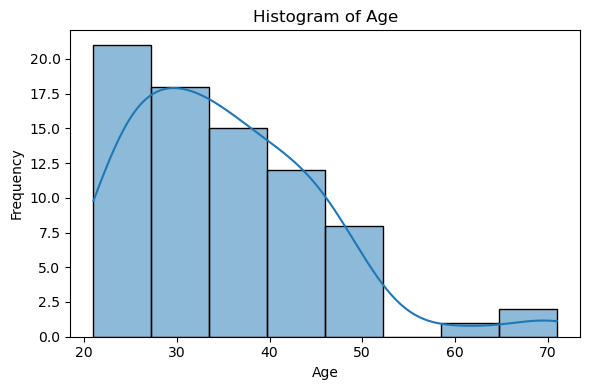

c:\Users\Partiran\anaconda3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


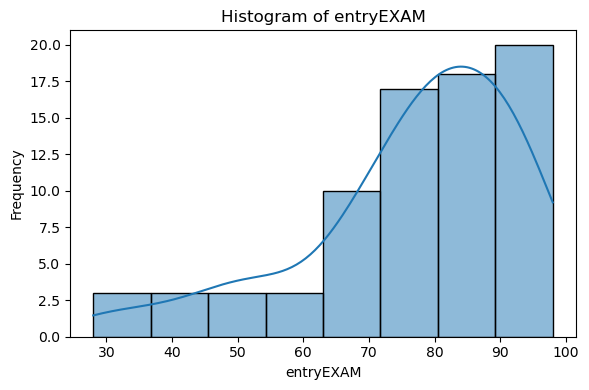

c:\Users\Partiran\anaconda3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


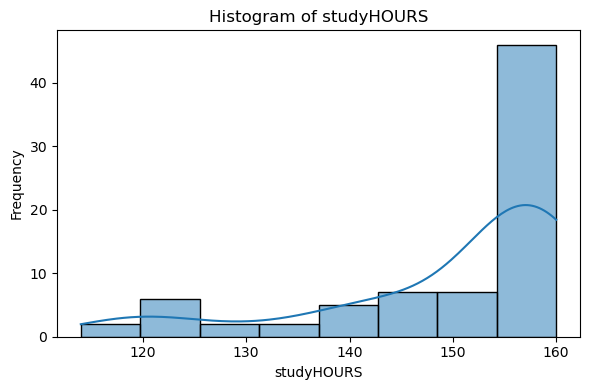

c:\Users\Partiran\anaconda3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


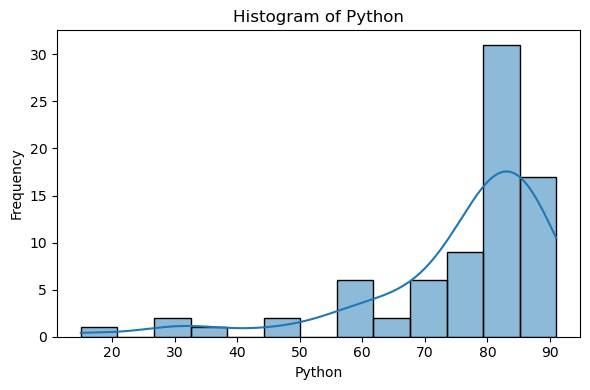

c:\Users\Partiran\anaconda3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


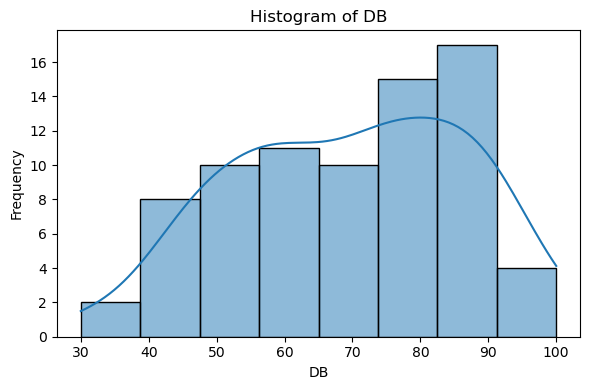

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric columns from the data
numerical_columns=df[df.select_dtypes(include=['int64', 'float64']).columns]

### Histograms for numeric variables
for col in numerical_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(numerical_columns[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

3. Barplot for categorical variables

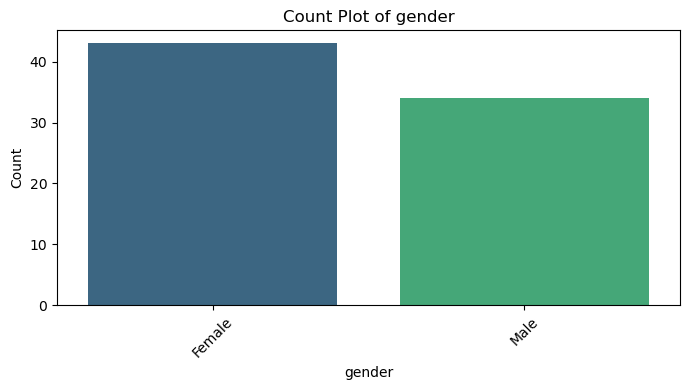

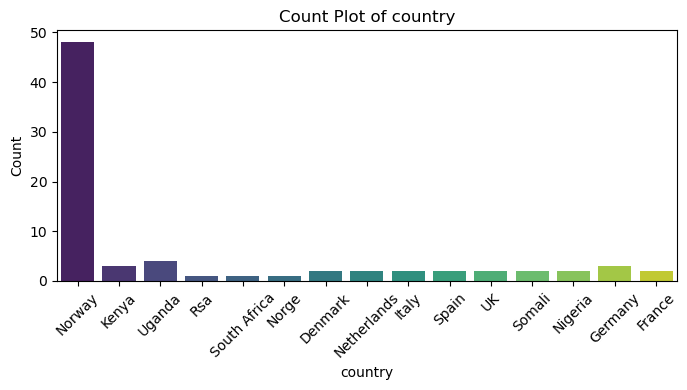

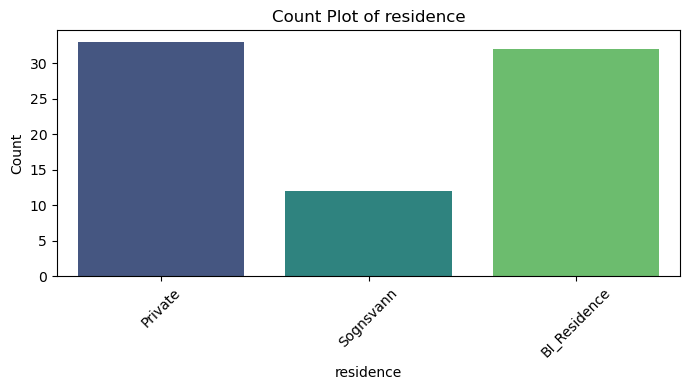

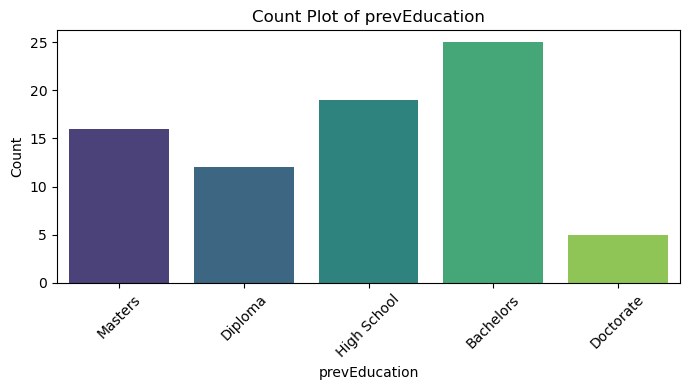

In [126]:
## Count plots for categorical variables (gender, country, residence, prevEducation)
categorical_cols = ['gender', 'country', 'residence', 'prevEducation']
for col in categorical_cols:
    if col in df.columns:
        plt.figure(figsize=(7,4))
        sns.countplot(data=df,x=col , palette='viridis')
        plt.title(f'Count Plot of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

4. Heatmap of correlations

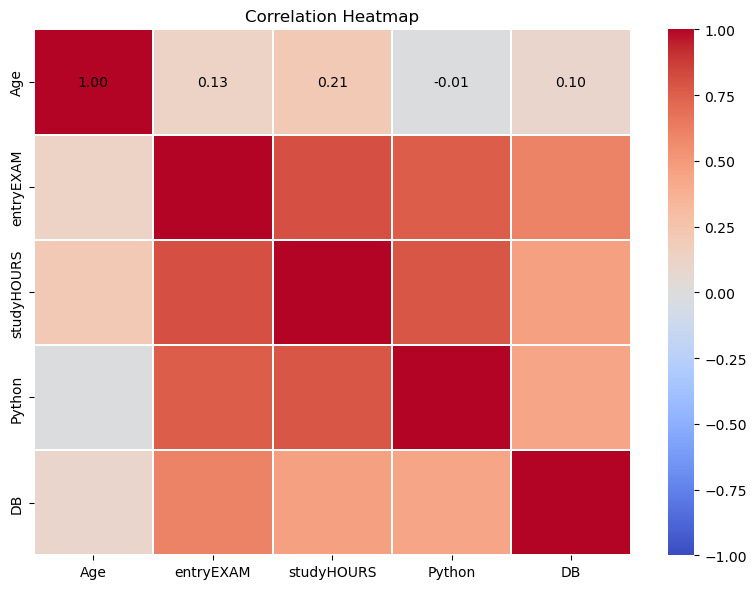

In [127]:

# Correlation Heatmap - ensure at least 2 numeric columns are available
if numerical_columns.shape[1] >= 2:
    plt.figure(figsize=(8,6))
    corr = numerical_columns.corr()
    sns.heatmap(corr, cmap='coolwarm', fmt='.2f',annot_kws={'color': 'black'}, vmin=-1, vmax=1, linewidths=0.2, annot=True)
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()
else:
    print('Not enough numeric columns for a correlation heatmap.')

5. Scatterplot studyHOURS vs scores

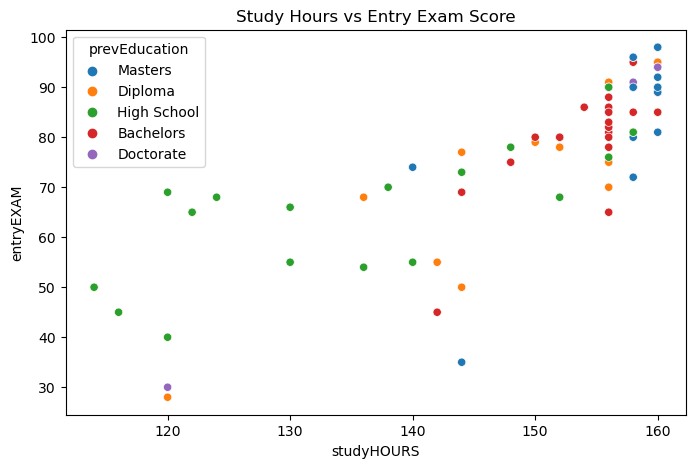

In [128]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="studyHOURS", y="entryEXAM", hue="prevEducation", data=df)
plt.title("Study Hours vs Entry Exam Score")
plt.show()



c:\Users\Partiran\anaconda3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Partiran\anaconda3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Partiran\anaconda3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Partiran\anaconda3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

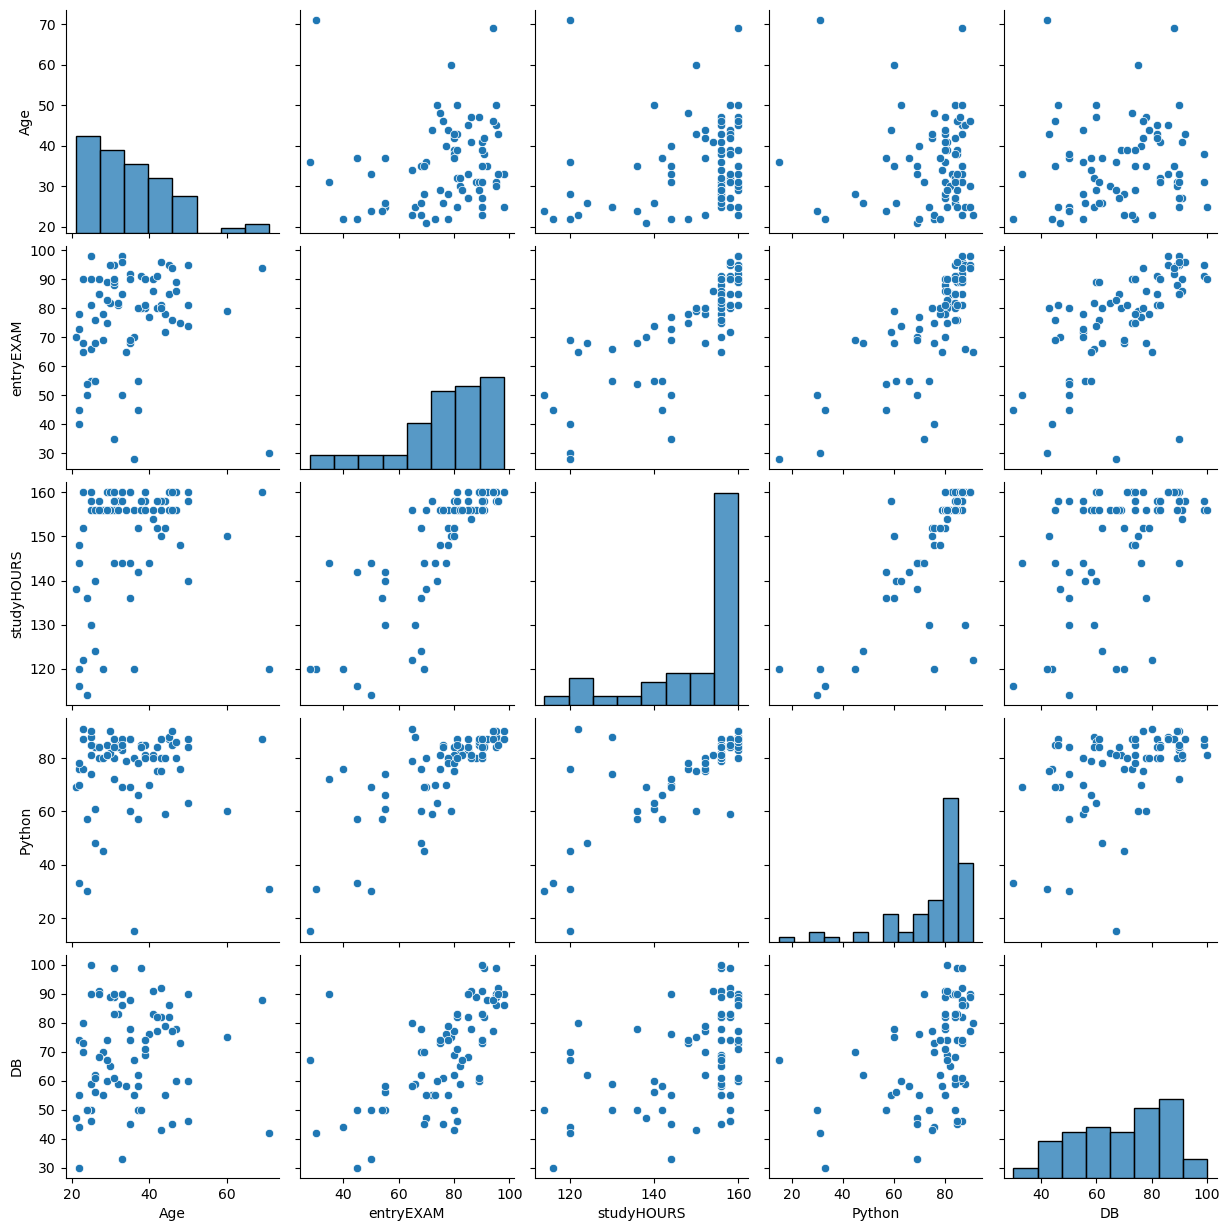

In [129]:
# Pair Plot to examine relationships among numeric variables
sns.pairplot(numerical_columns)
plt.show()


1. Examining the distribution of each column (diagonal plots)

On the diagonal of the matrix, a histogram of each column is displayed.

Example:

Column studyHOURS â†’ most students studied between 120 and 160 hours.

Column Python â†’ most scores are between 60 and 80.

This helps to see the concentration of data and detect skewness or asymmetrical distributions.

ðŸ”¹ 2. Examining pairwise relationships (scatter plots)

Each off-diagonal cell shows a scatter plot between two numeric columns.

Example:

studyHOURS vs scores â†’ the scatter is roughly upward, meaning more study is associated with higher scores.

entryEXAM vs Python â†’ a relative upward trend is observed.

ðŸ”¹ 3. Detecting correlations

From the scatter plots, we can see which variables are positively correlated:

studyHOURS and Python â†’ almost a positive correlation.

DB and Python â†’ moderate to positive correlation.

If points are very scattered â†’ correlation is low.

ðŸ”¹ 4. Identifying outliers

Points far away from the rest of the scatter â†’ possible outliers.

For example, in studyHOURS, a few samples below 120 hours could be checked.

ðŸ”¹ 5. Quick summary

Most columns have roughly normal or semi-normal distributions.
Some positive correlations are observed between scores and study hours.
Some outliers can be identified.

Feature Engineering

Encode categorical variables

In [134]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for column in ['gender','country','residence','prevEducation']:
    df[column]=le.fit_transform(df[column])
df.head()

fNAME      lNAME  Age  gender  country  residence  entryEXAM  \
0  Christina     Binger   44       0        8          1         72   
1       Alex   Walekhwa   60       1        4          1         79   
2     Philip        Leo   25       1       14          2         55   
3      Shoni  Hlongwane   22       0        9          2         40   
4      Maria   Kedibone   23       0       11          2         65   

   prevEducation  studyHOURS     Python  DB  
0              4         158  59.000000  55  
1              1         150  60.000000  75  
2              3         130  74.000000  50  
3              3         120  75.853333  44  
4              3         122  91.000000  80

Create binary column Pass_Python

In [136]:
df['Pass_Python'] = df['Python'].apply(lambda x: 1 if x >= 60 else 0)
df.head()

fNAME      lNAME  Age  gender  country  residence  entryEXAM  \
0  Christina     Binger   44       0        8          1         72   
1       Alex   Walekhwa   60       1        4          1         79   
2     Philip        Leo   25       1       14          2         55   
3      Shoni  Hlongwane   22       0        9          2         40   
4      Maria   Kedibone   23       0       11          2         65   

   prevEducation  studyHOURS     Python  DB  Pass_Python  
0              4         158  59.000000  55            0  
1              1         150  60.000000  75            1  
2              3         130  74.000000  50            1  
3              3         120  75.853333  44            1  
4              3         122  91.000000  80            1

Standardize numerical features (StandardScaler)

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fNAME          77 non-null     object 
 1   lNAME          77 non-null     object 
 2   Age            77 non-null     int64  
 3   gender         77 non-null     int64  
 4   country        77 non-null     int64  
 5   residence      77 non-null     int64  
 6   entryEXAM      77 non-null     int64  
 7   prevEducation  77 non-null     int64  
 8   studyHOURS     77 non-null     int64  
 9   Python         77 non-null     float64
 10  DB             77 non-null     int64  
 11  Pass_Python    77 non-null     int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 7.3+ KB


In [141]:
from sklearn.preprocessing import StandardScaler
import numpy as np
df_numeric_columns=df.select_dtypes(np.number)
scaler=StandardScaler()
x=df_numeric_columns.drop(columns=['Pass_Python'])
df_numeric_Standardize=scaler.fit_transform(x)
print("5 sample of standard",df_numeric_Standardize[:5])

5 sample of standard [[ 0.85572342 -0.88921183  0.13443996  0.36588087 -0.29039078  1.35200491
   0.65446673 -1.11558699 -0.85491713]
 [ 2.41296308  1.12459143 -1.20128606  0.36588087  0.13726122 -0.54080196
   0.02256782 -1.04939314  0.32692522]
 [-0.99349868  1.12459143  2.13802899  1.7745222  -1.32897421  0.72106929
  -1.55717945 -0.12267927 -1.15037772]
 [-1.28548112 -0.88921183  0.46837146  1.7745222  -2.24537136  0.72106929
  -2.34705309  0.         -1.50493043]
 [-1.18815364 -0.88921183  1.13623447  1.7745222  -0.71804278  0.72106929
  -2.18907836  1.00261616  0.62238581]]
